In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter

In [34]:
dataset = pd.read_csv("./datasets/train.csv")

In [35]:
X = dataset.iloc[:, 0:20].values
y = dataset.iloc[:, 20].values

In [36]:
# Row normalization
# for i, x in enumerate(X):
#     minVal = np.min(x)
#     norm_x = x - minVal
#     maxVal = np.max(norm_x)
#     norm_x /= maxVal
#     X[i] = norm_x
    
# Column normalization
for i in range(X.shape[1]):
    x = X[:, i]
    minVal = np.min(x)
    norm_x = x - minVal
    maxVal = np.max(norm_x)
    norm_x /= maxVal
    X[:, i] = norm_x

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
K_VALUES = [(2 * i + 1) for i in range(1, 10)]
K_ACCURACY = []
for K in K_VALUES:
    match = 0
    total = 0
    for test_point_index, test_point in enumerate(X_test):
        distances_dict = Counter()
        class_count = Counter()

        for index, train_point in enumerate(X_train):
            distances_dict[index] = np.sum(np.square(test_point - train_point))

        for point_index, point in distances_dict.most_common()[-K:]:
            class_count[y_train[point_index]] += 1
        
        if class_count.most_common(1)[0][0] == y_test[test_point_index]:
            match += 1
        total += 1
    K_ACCURACY.append(match / total)

In [39]:
df = []
for i, value in enumerate(K_VALUES):
    df.append([value, K_ACCURACY[i]])
df = pd.DataFrame(df)
df.columns = ['K', 'Accuracy']
df

,K,Accuracy
0,3,0.3775
1,5,0.3975
2,7,0.4050
3,9,0.4275
4,11,0.4250
5,13,0.4450
6,15,0.4350
7,17,0.4350
8,19,0.4550


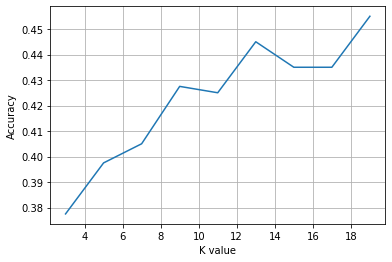

In [40]:
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.plot(K_VALUES, K_ACCURACY)
plt.grid()
plt.show()